[[997.38843601 460.39347341]]
gen_com.npy
[[996.76231769 455.59754446]]
gen_kmeans_n=1.npy
[[974.87004327 496.1983697 ]]
gen_pso_l0.npy
[[976.30771542 495.47511769]]
gen_pso_l2.npy
[[977.35049919 494.21916067]]
gen_pso_linf.npy
[[1430.97495163  181.77568594]]
panel_com.npy
[[1438.09390677  177.94710485]]
panel_pso_l0.npy
[[1434.18888646  171.43388863]]
panel_pso_l2.npy
[[1426.73982651  174.1020218 ]]
panel_pso_linf.npy
[[947.2402873  484.27144892]]
road_com.npy
[[979.97558267 481.75288887]]
road_hdbscan.npy
[[971.03553447 491.31558894]]
road_pso_l0.npy
[[973.61045989 488.27254752]]
road_pso_l2.npy
[[971.50815709 488.93204455]]
road_pso_linf.npy
[[1508.28180109  620.31235517]]
rv_com.npy
[[1543.48138154  629.82483561]]
rv_pso_l0.npy
[[1538.81511201  634.13456245]]
rv_pso_l2.npy
[[1544.04682917  631.18077182]]
rv_pso_linf.npy
[[344.60451466 425.89224779]]
sidem_com.npy
[[362.52038207 437.4731622 ]]
sidem_kmeans_n=5.npy
[[401.23313812 420.85624071]]
sidem_pso_l0.npy
[[402.70972254 410.437

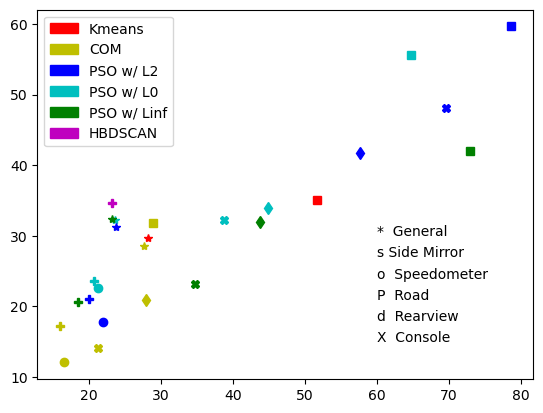

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.patches as mp

dir_list = os.listdir('clusterData')

varInfo = np.zeros(shape=(3, len(dir_list)))

for i in range(len(dir_list)):
    centroid = np.load('clusterData\\' + str(dir_list[i]))
    if len(np.where(centroid[0, :]==0)[0]) != 0:
        varInfo[:, i] = np.nan
    else:
        n = len(centroid[:, 0])
        if n == 2:
            C = np.diag(np.ones(len(centroid[0, :])))
        else:
            C = np.diag(centroid[2, :])
        
        
        dispMatr = np.ones(shape=(34))[None].T @ (centroid[:2, :] @ np.ones(shape=(34))[None].T/34).T
        print((centroid[:2, :] @ np.ones(shape=(34))[None].T/34).T)
        print(dir_list[i])
        centered = centroid[:2, :] - dispMatr.T
        covar = centered @ C @ centered.T/sum(np.diag(C))
        varInfo[0, i] = np.sqrt(covar[0, 0]); varInfo[1, i] = np.sqrt(covar[1, 1])
        varInfo[2, i] = covar[0, 1]/(covar[0, 0]*covar[1, 1])

fig = plt.figure()

for i in range(34):
    if dir_list[i].split('_')[0] == 'gen':
        shape = '*'
    if dir_list[i].split('_')[0] == 'sidem':
        shape = 's'
    if dir_list[i].split('_')[0] == 'speedom':
        shape = 'o'
    if dir_list[i].split('_')[0] == 'road':
        shape = 'P'
    if dir_list[i].split('_')[0] == 'rv':
        shape = 'd'
    if dir_list[i].split('_')[0] == 'panel':
        shape = 'X'
    if dir_list[i].split('_')[1] == 'kmeans':
        color = 'r'
    if dir_list[i].split('_')[1] == 'pso':
        if dir_list[i].split('_')[2] == 'l2.npy':
            color = 'b'
        if dir_list[i].split('_')[2] == 'l0.npy':
            color = 'c'
        if dir_list[i].split('_')[2] == 'linf.npy':
            color = 'g'
    if dir_list[i].split('_')[1] == 'com.npy':
        color = 'y'
    if dir_list[i].split('_')[1] == 'hdbscan.npy':
        color = 'm'
    plt.plot(varInfo[0, i], varInfo[1, i], marker=shape, color=color)

rp = mp.Patch(color='r', label='Kmeans')
yp = mp.Patch(color='y', label='COM')
bp = mp.Patch(color='b', label='PSO w/ L2')
cp = mp.Patch(color='c', label='PSO w/ L0')
gp = mp.Patch(color='g', label='PSO w/ Linf')
magp = mp.Patch(color='m', label='HBDSCAN')
plt.legend(handles=[rp, yp, bp, cp, gp, magp], loc='upper left')

plt.text(60, 30, '*  General')
plt.text(60, 27, 's Side Mirror')
plt.text(60, 24, 'o  Speedometer')
plt.text(60, 21, 'P  Road')
plt.text(60, 18, 'd  Rearview')
plt.text(60, 15, 'X  Console')
plt.show()


Redoing the above plot but for unweighted COM

[[997.38843601 460.39347341]]
gen_com.npy
[[996.76231769 455.59754446]]
gen_kmeans_n=1.npy
[[974.87004327 496.1983697 ]]
gen_pso_l0.npy
[[976.30771542 495.47511769]]
gen_pso_l2.npy
[[977.35049919 494.21916067]]
gen_pso_linf.npy
[[1430.97495163  181.77568594]]
panel_com.npy
[[1438.09390677  177.94710485]]
panel_pso_l0.npy
[[1434.18888646  171.43388863]]
panel_pso_l2.npy
[[1426.73982651  174.1020218 ]]
panel_pso_linf.npy
[[947.2402873  484.27144892]]
road_com.npy
[[979.97558267 481.75288887]]
road_hdbscan.npy
[[971.03553447 491.31558894]]
road_pso_l0.npy
[[973.61045989 488.27254752]]
road_pso_l2.npy
[[971.50815709 488.93204455]]
road_pso_linf.npy
[[1508.28180109  620.31235517]]
rv_com.npy
[[1543.48138154  629.82483561]]
rv_pso_l0.npy
[[1538.81511201  634.13456245]]
rv_pso_l2.npy
[[1544.04682917  631.18077182]]
rv_pso_linf.npy
[[344.60451466 425.89224779]]
sidem_com.npy
[[362.52038207 437.4731622 ]]
sidem_kmeans_n=5.npy
[[401.23313812 420.85624071]]
sidem_pso_l0.npy
[[402.70972254 410.437

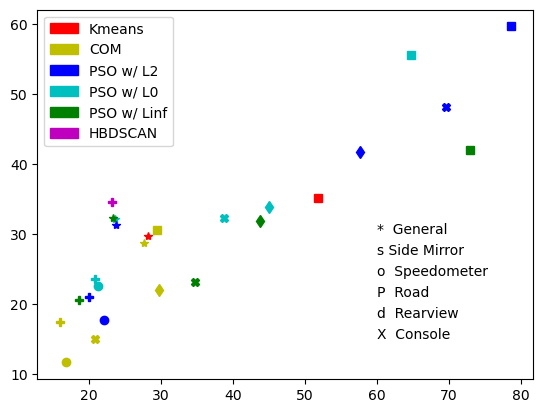

In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.patches as mp

dir_list = os.listdir('clusterData')

varInfo = np.zeros(shape=(3, len(dir_list)))

for i in range(len(dir_list)):
    centroid = np.load('clusterData\\' + str(dir_list[i]))
    if len(np.where(centroid[0, :]==0)[0]) != 0:
        varInfo[:, i] = np.nan
    else:
        n = len(centroid[:, 0])
        if n == 2:
            C = np.diag(np.ones(len(centroid[0, :])))
        else:
            C = np.diag(np.ones(len(centroid[0, :])))
        
        
        dispMatr = np.ones(shape=(34))[None].T @ (centroid[:2, :] @ np.ones(shape=(34))[None].T/34).T
        print((centroid[:2, :] @ np.ones(shape=(34))[None].T/34).T)
        print(dir_list[i])
        centered = centroid[:2, :] - dispMatr.T
        covar = centered @ C @ centered.T/sum(np.diag(C))
        varInfo[0, i] = np.sqrt(covar[0, 0]); varInfo[1, i] = np.sqrt(covar[1, 1])
        varInfo[2, i] = covar[0, 1]/(covar[0, 0]*covar[1, 1])

fig = plt.figure()

for i in range(34):
    if dir_list[i].split('_')[0] == 'gen':
        shape = '*'
    if dir_list[i].split('_')[0] == 'sidem':
        shape = 's'
    if dir_list[i].split('_')[0] == 'speedom':
        shape = 'o'
    if dir_list[i].split('_')[0] == 'road':
        shape = 'P'
    if dir_list[i].split('_')[0] == 'rv':
        shape = 'd'
    if dir_list[i].split('_')[0] == 'panel':
        shape = 'X'
    if dir_list[i].split('_')[1] == 'kmeans':
        color = 'r'
    if dir_list[i].split('_')[1] == 'pso':
        if dir_list[i].split('_')[2] == 'l2.npy':
            color = 'b'
        if dir_list[i].split('_')[2] == 'l0.npy':
            color = 'c'
        if dir_list[i].split('_')[2] == 'linf.npy':
            color = 'g'
    if dir_list[i].split('_')[1] == 'com.npy':
        color = 'y'
    if dir_list[i].split('_')[1] == 'hdbscan.npy':
        color = 'm'
    plt.plot(varInfo[0, i], varInfo[1, i], marker=shape, color=color)

rp = mp.Patch(color='r', label='Kmeans')
yp = mp.Patch(color='y', label='COM')
bp = mp.Patch(color='b', label='PSO w/ L2')
cp = mp.Patch(color='c', label='PSO w/ L0')
gp = mp.Patch(color='g', label='PSO w/ Linf')
magp = mp.Patch(color='m', label='HBDSCAN')
plt.legend(handles=[rp, yp, bp, cp, gp, magp], loc='upper left')

plt.text(60, 30, '*  General')
plt.text(60, 27, 's Side Mirror')
plt.text(60, 24, 'o  Speedometer')
plt.text(60, 21, 'P  Road')
plt.text(60, 18, 'd  Rearview')
plt.text(60, 15, 'X  Console')
plt.show()


[-1.93816008e+01 -9.20962735e+00 -6.09059860e+00 -3.89418156e+01
  1.88486949e+01 -4.18746685e+00 -1.62897623e+01  1.41388872e+01
  4.60883600e-01 -1.45074188e+01 -1.54397261e+01 -2.95625381e+01
 -1.78311817e+01  3.88932226e+01 -5.19910725e+00  1.14612598e+01
  2.32743957e+01  1.36574797e+01  2.58773095e+01 -8.87282522e-01
  9.17108356e+00 -6.52246956e+00  9.53483516e+00  1.30812590e+01
  2.49489497e-01 -1.02032285e+01  1.25219624e+01  1.81193931e+01
  2.79300640e+00 -2.48026353e-02 -2.83281495e+00  1.72793292e+00
 -4.51764791e+00 -1.21820056e+01]


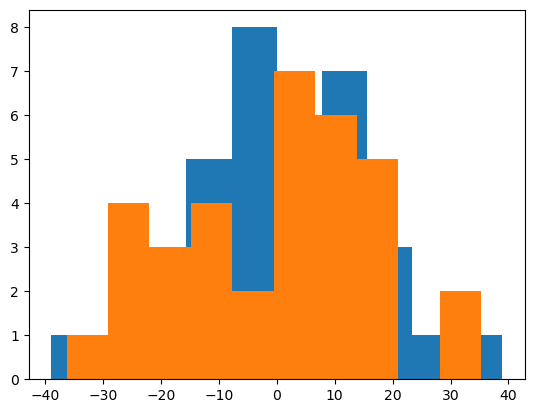

In [21]:
import statistics as stat

offset = np.zeros(shape=(6, 2, 34))
m = 0
for i in range(len(dir_list)):
    if dir_list[i].split('_')[1] == 'com.npy':
        centroid = np.load('clusterData\\' + str(dir_list[i]))
        offset[m, 1, :] = centroid[1, :] - stat.fmean(centroid[1, :])
        offset[m, 0, :] = centroid[0, :] - stat.fmean(centroid[0, :])
        m = m + 1

xoffAvgs = np.zeros(34)
yoffAvgs = np.zeros(34)
for i in range(34):
    xoffAvgs[i] = stat.fmean(offset[:, 0, i])
    yoffAvgs[i] = stat.fmean(offset[:, 1, i])
plt.hist(xoffAvgs)
print(xoffAvgs)
plt.hist(yoffAvgs)
plt.show()
        